In [ ]:
import pandas as pd

# Load the MovieLens movies data with latin1 encoding
movies_df = pd.read_csv("movies.dat", sep="::", engine="python", names=["item_id", "title", "genre"], encoding="latin1")

# Load the MovieLens ratings data with latin1 encoding
ratings_df = pd.read_csv("ratings.dat", sep="::", engine="python", names=["user_id", "item_id", "rating", "timestamp"], encoding="latin1")

# Show the first few rows to confirm
print("Movies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())


Movies DataFrame:
   item_id                               title                         genre
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Ratings DataFrame:
   user_id  item_id  rating  timestamp
0        1     1193       5  978300760
1        1      661       3  978302109
2        1      914       3  978301968
3        1     3408       4  978300275
4        1     2355       5  978824291


In [ ]:
movies_df

,item_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
ratings_df

,user_id,item_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
132964,858,3099,3,975344219
132965,858,968,5,975344753
132966,858,1641,5,975344268
132967,858,2453,5,975343822


#Phase 1: Data Preparation & Exploration

Number of movies per genre

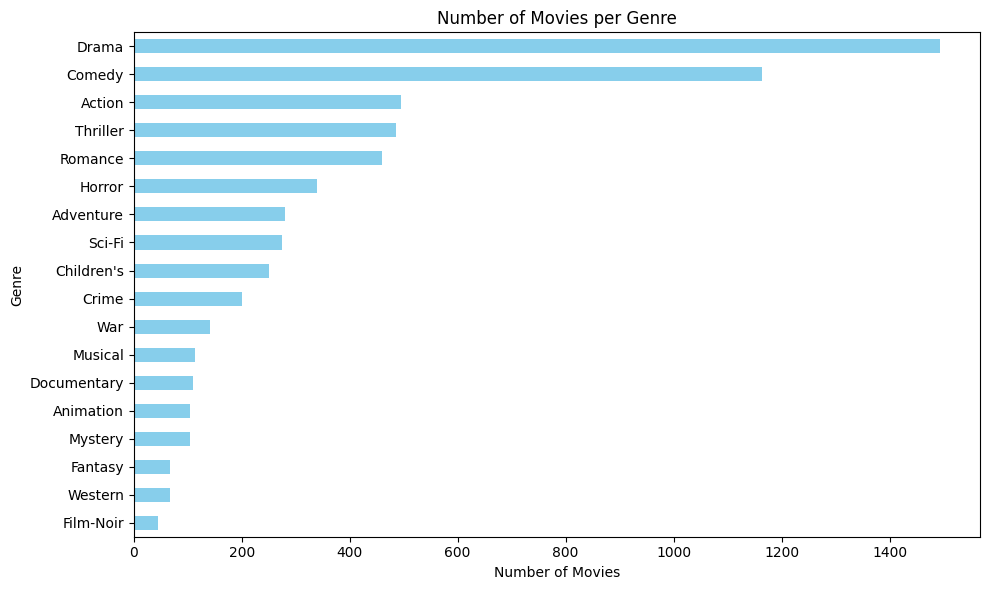

In [ ]:




import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
movies_df = pd.read_csv("movies.dat", sep="::", engine="python", encoding="latin-1", header=None, names=["MovieID", "Title", "Genres"])
ratings_df = pd.read_csv("ratings.dat", sep="::", engine="python", encoding="latin-1", header=None, names=["UserID", "MovieID", "Rating", "Timestamp"])

# Merge and clean
movie_data = pd.merge(ratings_df, movies_df, on="MovieID")
movie_data_cleaned = movie_data.drop_duplicates().dropna()

# Expand genres
genre_expanded = movie_data_cleaned.copy()
genre_expanded['Genres'] = genre_expanded['Genres'].str.split('|')
genre_expanded = genre_expanded.explode('Genres')

# Genre count
genre_movie_counts = genre_expanded[['MovieID', 'Genres']].drop_duplicates()
genre_counts = genre_movie_counts['Genres'].value_counts().sort_values(ascending=False)

# Visualization 1: Number of Movies per Genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#Phase 2: Popularity & Genre Correlation

In [ ]:
#Compute Popularity Tiers

movie_rating_counts = ratings_df.groupby("MovieID")["Rating"].count().reset_index(name="RatingCount")
movie_with_counts = pd.merge(movies_df, movie_rating_counts, on="MovieID")
movie_with_counts["Popularity"] = pd.qcut(movie_with_counts["RatingCount"], q=4, labels=["Low", "Medium", "High", "Very High"])


Genre-wise Rating Volume

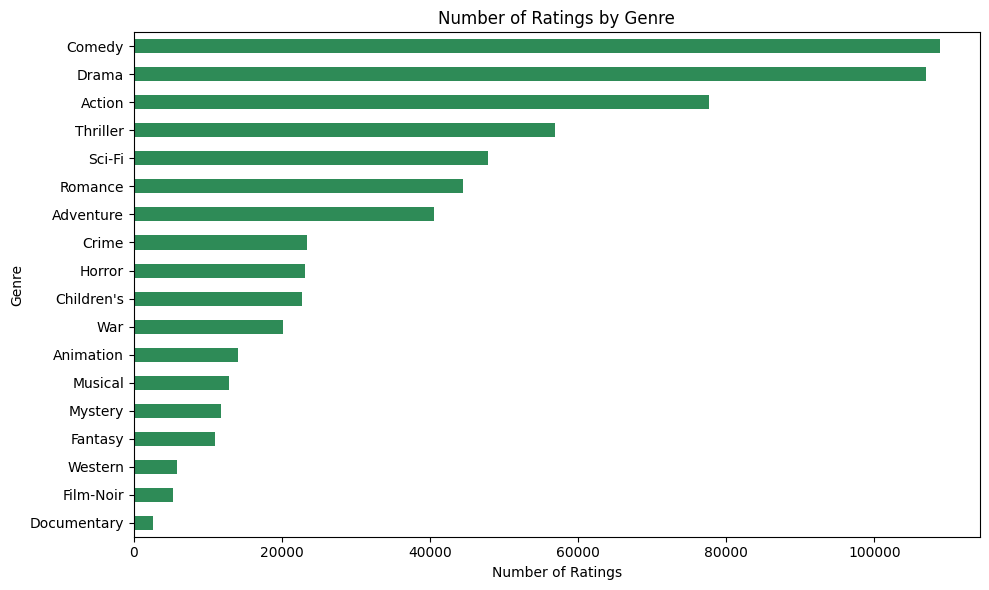

In [ ]:


genre_rating_count = genre_expanded.groupby("Genres")["Rating"].count().sort_values(ascending=False)

genre_rating_count.plot(kind='barh', color='seagreen', figsize=(10, 6))
plt.title("Number of Ratings by Genre")
plt.xlabel("Number of Ratings")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Genre-wise Average Ratings


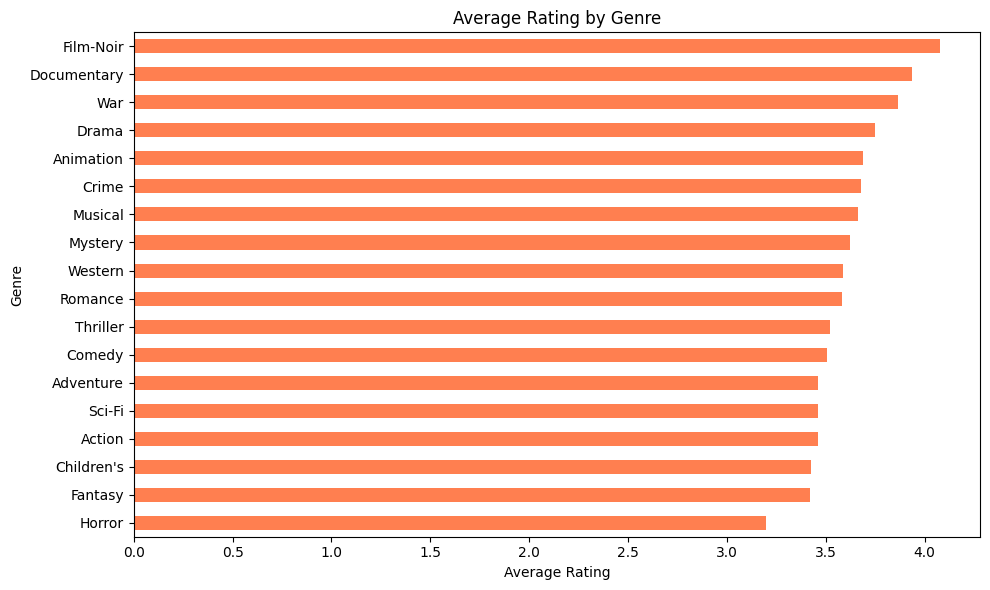

In [ ]:


genre_expanded = movie_data_cleaned.copy()
genre_expanded['Genres'] = genre_expanded['Genres'].str.split('|')
genre_expanded = genre_expanded.explode('Genres')

genre_avg_rating = genre_expanded.groupby("Genres")["Rating"].mean().sort_values(ascending=False)

genre_avg_rating.plot(kind='barh', color='coral', figsize=(10, 6))
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
users_df = pd.read_csv("users.dat", sep="::", engine="python", header=None,
                       names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
full_data = pd.merge(movie_data_cleaned, users_df, on="UserID")
genre_user_data = full_data.copy()
genre_user_data['Genres'] = genre_user_data['Genres'].str.split('|')
genre_user_data = genre_user_data.explode('Genres')


In [ ]:
users_df

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


Genre Preference by Gender

In [ ]:
import pandas as pd

ratings = pd.read_csv("ratings.dat", sep="::", engine="python",
                      names=["UserID", "MovieID", "Rating", "Timestamp"])


**Preparing data for RecBole**

In [ ]:
import os
import pandas as pd

# Load the data
movies_df = pd.read_csv("movies.dat", sep="::", engine='python', encoding='ISO-8859-1', header=None, names=["MovieID", "Title", "Genres"])
ratings_df = pd.read_csv("ratings.dat", sep="::", engine='python', encoding='ISO-8859-1', header=None, names=["UserID", "MovieID", "Rating", "Timestamp"])
users_df = pd.read_csv("users.dat", sep="::", engine='python', encoding='ISO-8859-1', header=None, names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

# Create the interaction DataFrame for RecBole
interaction_df = ratings_df[['UserID', 'MovieID', 'Rating']]  # Extract relevant columns

# Create the user DataFrame for RecBole
user_df = users_df[['UserID', 'Gender', 'Age', 'Occupation']]  # Extract relevant columns

# Create the item (movie) DataFrame for RecBole
movie_df = movies_df[['MovieID', 'Title', 'Genres']]  # Extract relevant columns

# Ensure the directory exists for saving the data
os.makedirs('./output/', exist_ok=True)

# Save the DataFrames to CSV files
interaction_df.to_csv('./output/interaction.csv', index=False)
user_df.to_csv('./output/user.csv', index=False)
movie_df.to_csv('./output/item.csv', index=False)

# Print the first few rows to confirm the data
print(interaction_df.head())
print(user_df.head())
print(movie_df.head())


   UserID  MovieID  Rating
0       1     1193       5
1       1      661       3
2       1      914       3
3       1     3408       4
4       1     2355       5
   UserID Gender  Age  Occupation
0       1      F    1          10
1       2      M   56          16
2       3      M   25          15
3       4      M   45           7
4       5      M   25          20
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [ ]:
!pip install numpy==1.24.4
!pip install tensorboard==2.12.3
!pip install recbole


  Using cached recbole-1.2.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached colorlog-4.7.2-py2.py3-none-any.whl.metadata (9.9 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl.metadata (14 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
  Using cached ray-2.6.3-cp311-cp311-manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (

In [ ]:
import os
os.kill(os.getpid(), 9)

Configure and Train a Recommender Model with **RecBole**

In [ ]:
!pip uninstall -y numpy tensorflow tensorboard
!pip install numpy==1.23.5 tensorboard==2.11.2 tensorflow==2.11.0

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: tensorboard 2.12.3
Uninstalling tensorboard-2.12.3:
  Successfully uninstalled tensorboard-2.12.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl.metadata (1.9 kB)
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 

In [ ]:
!pip install tensorflow==2.12.0 tensorboard==2.12.0


  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached tensorboard-2.12.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl.metadata (2.7 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.0.0
    Uninstalling google-auth-oauthlib-1.0.0:
      Successfully uninstalled google-auth-oauthlib-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

In [ ]:
# Try importing the necessary libraries
import recbole
import numpy as np
import tensorflow as tf
import tensorboard

In [ ]:
# Print the versions to verify installation
print("RecBole version:", recbole.__version__)
print("Numpy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("TensorBoard version:", tensorboard.__version__)


RecBole version: 1.2.1
Numpy version: 1.23.5
TensorFlow version: 2.12.0
TensorBoard version: 2.12.0


In [ ]:
import pandas as pd
import os

# Read original MovieLens .dat files
movies = pd.read_csv("movies.dat", sep="::", engine='python', encoding='ISO-8859-1',
                     header=None, names=["MovieID", "Title", "Genres"])
ratings = pd.read_csv("ratings.dat", sep="::", engine='python', encoding='ISO-8859-1',
                      header=None, names=["UserID", "MovieID", "Rating", "Timestamp"])
users = pd.read_csv("users.dat", sep="::", engine='python', encoding='ISO-8859-1',
                    header=None, names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

# Drop Zip-code (not used here)
users.drop(columns=["Zip-code"], inplace=True)


# Create output folder
os.makedirs("./output/movielens", exist_ok=True)

# Save files in RecBole-compatible format (CSV)
ratings.rename(columns={
    "UserID": "UserID", "MovieID": "MovieID", "Rating": "Rating", "Timestamp": "Timestamp"
}, inplace=True)
ratings.to_csv("./output/movielens/inter.csv", index=False)

movies.rename(columns={"MovieID": "MovieID", "Title": "Title", "Genres": "Genres"}, inplace=True)
movies.to_csv("./output/movielens/item.csv", index=False)

users.rename(columns={"UserID": "UserID", "Gender": "Gender", "Age": "Age", "Occupation": "Occupation"}, inplace=True)
users.to_csv("./output/movielens/user.csv", index=False)


In [ ]:
yaml_config = """
dataset: movielens
data_path: ./output/

field_separator: ","

USER_ID_FIELD: UserID
ITEM_ID_FIELD: MovieID
RATING_FIELD: Rating
TIME_FIELD: Timestamp
LABEL_FIELD: Rating

load_col:
    inter: [UserID, MovieID, Rating, Timestamp]
    item: [MovieID, Title, Genres]
    user: [UserID, Gender, Age, Occupation]

threshold:
  Rating: 3.5

metrics: ["Recall", "NDCG", "Precision", "MAP", "MRR", "Hit"]
topk: 10

eval_args:
    split: {'RS': [0.8, 0.1, 0.1]}
    order: RO
    mode: full
"""

# Save to file
with open("recbole_config.yaml", "w") as f:
    f.write(yaml_config)



In [ ]:
import pandas as pd

# files
movies_df = pd.read_csv("movies.dat", sep="::", engine='python', encoding='ISO-8859-1',
                        header=None, names=["MovieID", "Title", "Genres"])
ratings_df = pd.read_csv("ratings.dat", sep="::", engine='python', encoding='ISO-8859-1',
                         header=None, names=["UserID", "MovieID", "Rating", "Timestamp"])
users_df = pd.read_csv("users.dat", sep="::", engine='python', encoding='ISO-8859-1',
                       header=None, names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
users_df = users_df.drop(columns=["Zip-code"])

# Write to RecBole format
ratings_df.to_csv("./output/movielens/movielens.inter", index=False, header=False)
movies_df.to_csv("./output/movielens/movielens.item", index=False, header=False)
users_df.to_csv("./output/movielens/movielens.user", index=False, header=False)

# Add correct headers with types
with open("./output/movielens/movielens.inter", "r") as f:
    content = f.read()
with open("./output/movielens/movielens.inter", "w") as f:
    f.write("UserID:token,MovieID:token,Rating:float,Timestamp:float\n" + content)

with open("./output/movielens/movielens.item", "r") as f:
    content = f.read()
with open("./output/movielens/movielens.item", "w") as f:
    f.write("MovieID:token,Title:token,Genres:token_seq\n" + content)

with open("./output/movielens/movielens.user", "r") as f:
    content = f.read()
with open("./output/movielens/movielens.user", "w") as f:
    f.write("UserID:token,Gender:token,Age:token,Occupation:token\n" + content)


In [ ]:
pip install torch==2.1.0 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 856.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from recbole.config import Config
from recbole.data import create_dataset
from recbole.quick_start import run_recbole

config = Config(model='BPR', dataset='movielens', config_file_list=['recbole_config.yaml'])
dataset = create_dataset(config)

run_recbole(model='BPR', dataset='movielens', config_file_list=['recbole_config.yaml'])


/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:501: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[field].fillna(value="", inplace=True)
/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:1217: FutureWarning: using <built-in function len> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  split_point = np.cumsum(feat[field].agg(len))[:-1]
/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:648: FutureWarn

{'best_valid_score': 0.3836,
 'valid_score_bigger': True,
 'best_valid_result': OrderedDict([('recall@10', 0.1487),
              ('ndcg@10', 0.2077),
              ('precision@10', 0.1611),
              ('map@10', 0.1077),
              ('mrr@10', 0.3836),
              ('hit@10', 0.7311)]),
 'test_result': OrderedDict([('recall@10', 0.1645),
              ('ndcg@10', 0.2532),
              ('precision@10', 0.1995),
              ('map@10', 0.149),
              ('mrr@10', 0.4363),
              ('hit@10', 0.7442)])}

In [ ]:
from recbole.config import Config
from recbole.data import create_dataset

# Load config
config = Config(model='BPR', dataset='movielens', config_file_list=['recbole_config.yaml'])

# Create and load dataset
dataset = create_dataset(config)



/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:501: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[field].fillna(value="", inplace=True)
/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:1217: FutureWarning: using <built-in function len> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  split_point = np.cumsum(feat[field].agg(len))[:-1]
/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:648: FutureWarn

In [ ]:
from recbole.quick_start import run_recbole

# run the training and evaluation
run_recbole(
    model='BPR',
    dataset='movielens',
    config_file_list=['recbole_config.yaml']
)


/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:501: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[field].fillna(value="", inplace=True)
/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:1217: FutureWarning: using <built-in function len> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  split_point = np.cumsum(feat[field].agg(len))[:-1]
/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:648: FutureWarn

{'best_valid_score': 0.3836,
 'valid_score_bigger': True,
 'best_valid_result': OrderedDict([('recall@10', 0.1487),
              ('ndcg@10', 0.2077),
              ('precision@10', 0.1611),
              ('map@10', 0.1077),
              ('mrr@10', 0.3836),
              ('hit@10', 0.7311)]),
 'test_result': OrderedDict([('recall@10', 0.1645),
              ('ndcg@10', 0.2532),
              ('precision@10', 0.1995),
              ('map@10', 0.149),
              ('mrr@10', 0.4363),
              ('hit@10', 0.7442)])}

In [ ]:
from recbole.quick_start import load_data_and_model
from recbole.utils.case_study import full_sort_topk
from recbole.config import Config
import pandas as pd
import torch

# Step 1: Load model and data
config = Config(model='BPR', dataset='movielens', config_file_list=['recbole_config.yaml'])
model_path = '/content/saved/BPR-Jun-25-2025_11-34-30.pth'
config, model, dataset, train_data, valid_data, test_data = load_data_and_model(model_file=model_path)

# Step 2: Field names
user_field = dataset.uid_field
item_field = dataset.iid_field

# Step 3: Unique user IDs from test set
user_ids = test_data.dataset.inter_feat[user_field].tolist()

# Step 4: Generate top-10 recommendations
user_list, item_list = full_sort_topk(
    uid_series=user_ids,
    model=model,
    test_data=test_data,
    k=10,
    device=config['device']
)

# Ensure user_list is flattened
user_list = [uid for uid in user_list]

# Convert item arrays to space-separated strings
item_list_str = [' '.join(map(str, row)) for row in item_list]

# Step 5: Create and save DataFrame
recommendations_df = pd.DataFrame({
    user_field: user_list,
    f'top_10_{item_field.lower()}s': item_list_str
})

recommendations_df.to_csv('top10_recommendations.csv', index=False)
print("✅ Saved top-10 recommendations to 'top10_recommendations.csv'")


/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:501: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[field].fillna(value="", inplace=True)
/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:1217: FutureWarning: using <built-in function len> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  split_point = np.cumsum(feat[field].agg(len))[:-1]
/usr/local/lib/python3.11/dist-packages/recbole/data/dataset/dataset.py:648: FutureWarn

✅ Saved top-10 recommendations to 'top10_recommendations.csv'


In [ ]:
import os
print(os.listdir('saved'))


['BPR-Jun-25-2025_11-47-31.pth', 'BPR-Jun-25-2025_11-34-30.pth']


In [ ]:
# Try reading the file with a different encoding
movies_df = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1', dtype=str)

# Continue with previous logic
recommendations_df = pd.read_csv('/content/top10_recommendations.csv', dtype=str)
# Corrected column name from 'top_10_items' to 'top_10_movieids'
recommendations_df['MovieIDs'] = recommendations_df['top_10_movieids'].apply(lambda x: x.split())
exploded_recs = recommendations_df.explode('MovieIDs')
exploded_recs['MovieID'] = exploded_recs['MovieIDs']

# Merge with movies_df to get genres
merged_df = pd.merge(exploded_recs, movies_df, on='MovieID', how='left')

# Count frequency of each genre
genre_counts = merged_df['Genres'].str.split('|').explode().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Display the genre count table
genre_counts.head()

,Genre,Count


In [ ]:
# Clean the MovieIDs by removing 'tensor(' and ')'
exploded_recs['MovieID'] = exploded_recs['MovieID'].str.extract(r'tensor\((\d+)\)')[0]

# Reattempt the merge after cleaning
merged_df = pd.merge(exploded_recs, movies_df, on='MovieID', how='left')

# Count frequency of each genre
genre_counts = merged_df['Genres'].str.split('|').explode().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Display the genre count table
genre_counts.head()


,Genre,Count
0,Drama,2125899
1,Comedy,1482995
2,Romance,716702
3,Thriller,700291
4,Action,660693


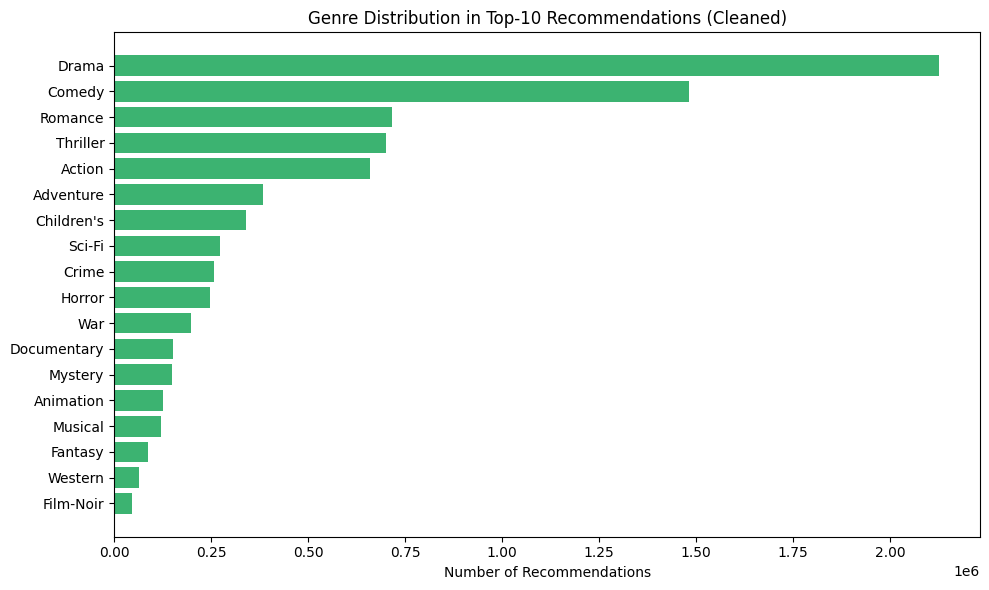

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
recommendations = pd.read_csv('top10_recommendations.csv')
movies = pd.read_csv('movies.dat', sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')

# Step 2: Clean tensor-formatted movie IDs
def clean_tensor_values(value):
    return [int(x.replace('tensor(', '').replace(')', '')) for x in value.split() if x.startswith('tensor')]

recommendations['MovieIDs'] = recommendations.iloc[:, 1].apply(clean_tensor_values)

# Step 3: Explode user-movie pairs
exploded = recommendations.explode('MovieIDs')
exploded['MovieIDs'] = exploded['MovieIDs'].astype(int)

# Step 4: Merge with movie metadata
merged = exploded.merge(movies, left_on='MovieIDs', right_on='MovieID')

# Step 5: Split multi-genre strings
merged['Genres'] = merged['Genres'].str.split('|')
genre_exploded = merged.explode('Genres')

# Step 6: Count genre frequencies
genre_counts = genre_exploded['Genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plot the genre distribution
plt.figure(figsize=(10, 6))
plt.barh(genre_counts['Genre'], genre_counts['Count'], color='mediumseagreen')
plt.xlabel('Number of Recommendations')
plt.title('Genre Distribution in Top-10 Recommendations (Cleaned)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 📊 Genre Representation Gap Analysis

This plot compares the share of each genre in the top-10 recommendations to its share in the overall movie dataset.

- **Over-represented genres** (positive gap): Genres like Romance, Drama, and Thriller are favored disproportionately by the recommender system.
- **Under-represented genres** (negative gap): Sci-Fi, Horror, and Musical are less likely to be recommended despite their presence in the dataset.

This suggests that the model exhibits a bias toward certain genres, possibly influenced by historical user ratings or popularity trends, leading to limited genre diversity in recommendations.


**Genre Co-occurrence in Popular Movies**

Some genres often appear together in popular movies.

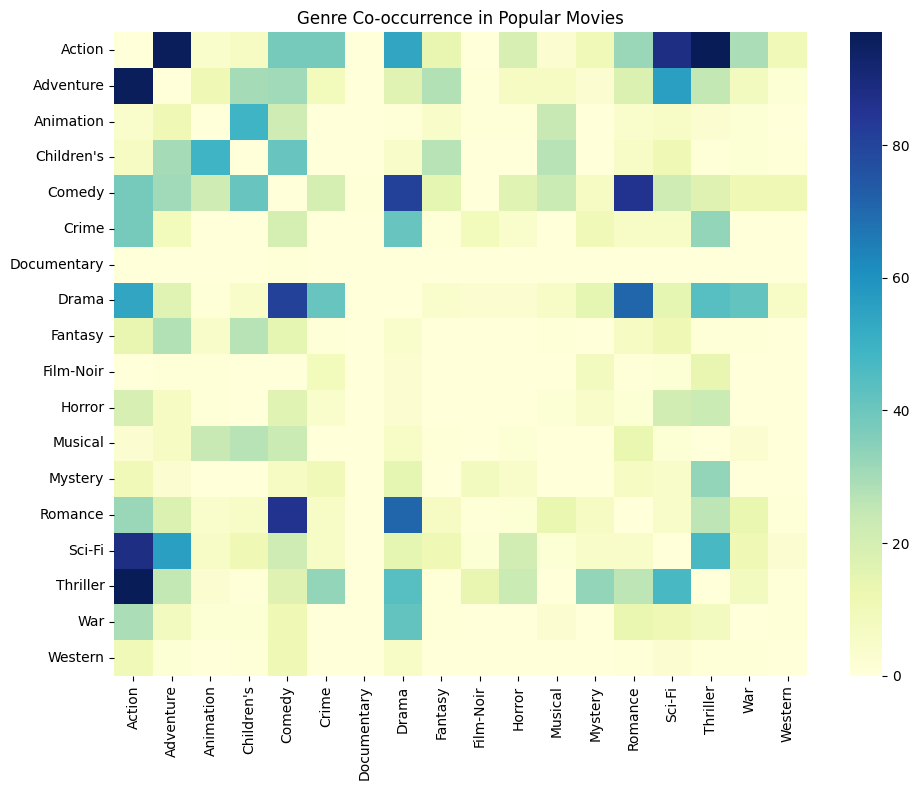

In [ ]:
from itertools import combinations
from collections import Counter
import seaborn as sns
import numpy as np

# Get genre pairs only for popular movies
popular_movies = genre_data[genre_data['Popularity'] == 'Popular']
genre_sets = popular_movies.groupby('MovieID')['Genres'].apply(set)
pair_counts = Counter()

for genre_set in genre_sets:
    for pair in combinations(sorted(genre_set), 2):
        pair_counts[pair] += 1

# Convert to matrix for heatmap
all_genres = sorted(set(g for s in genre_sets for g in s))
matrix = pd.DataFrame(0, index=all_genres, columns=all_genres)

for (g1, g2), count in pair_counts.items():
    matrix.loc[g1, g2] = count
    matrix.loc[g2, g1] = count

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title("Genre Co-occurrence in Popular Movies")
plt.tight_layout()
plt.show()


🔍 Key Insights:
🎭 Drama appears frequently with many genres, showing its role as a core narrative layer in multi-genre movies.

💥 Action, Adventure, and Sci-Fi form a strong co-occurrence cluster, reflecting their typical pairing in blockbuster and franchise films.

😂 Comedy has notable overlaps with Romance, Animation, and Drama, suggesting these genres are commonly mixed for broader appeal.

😱 Horror co-occurs with Thriller and Mystery, which is expected due to their thematic similarity.

👧 Children’s movies often blend with Animation, Comedy, and occasionally Fantasy, forming a recognizable genre group.

🎬 Genres like Western, War, and Film-Noir show lower co-occurrence, indicating their niche or standalone nature in popular titles.

***Applying AIF 360 for fairness and bias matrics bold text***

In [ ]:
!pip install -q aif360


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv("top10_recommendations.csv")
print(df.columns)
print(df['UserID'].head(5))



Index(['UserID', 'top_10_movieids'], dtype='object')
0    tensor([8.0801, 7.2127, 7.0876, 6.7804, 6.6911...
1    tensor([8.0801, 7.2127, 7.0876, 6.7804, 6.6911...
2    tensor([8.0801, 7.2127, 7.0876, 6.7804, 6.6911...
3    tensor([8.0801, 7.2127, 7.0876, 6.7804, 6.6911...
4    tensor([8.0801, 7.2127, 7.0876, 6.7804, 6.6911...
Name: UserID, dtype: object


In [ ]:
import pandas as pd
import re

# Load recommendation results
recs = pd.read_csv("top10_recommendations.csv")

# Extract numeric user_id from string if formatted as "tensor([...])"
def extract_id(x):
    if isinstance(x, str) and 'tensor' in x:
        return int(float(re.findall(r'\d+\.\d+|\d+', x)[0]))  # grabs the first number
    return int(x)

recs['user_id'] = recs['UserID'].apply(extract_id)

# Load user metadata
users = pd.read_csv("users.dat", sep="::", engine='python', names=['user_id', 'gender', 'age', 'occupation', 'zip'])

# Merge both on user_id
merged = pd.merge(recs[['user_id', 'top_10_movieids']], users, on='user_id')
print(merged.head())



   user_id                                    top_10_movieids gender  age  \
0        8  tensor(391) tensor(168) tensor(10) tensor(105)...      M   25   
1        8  tensor(391) tensor(168) tensor(10) tensor(105)...      M   25   
2        8  tensor(391) tensor(168) tensor(10) tensor(105)...      M   25   
3        8  tensor(391) tensor(168) tensor(10) tensor(105)...      M   25   
4        8  tensor(391) tensor(168) tensor(10) tensor(105)...      M   25   

   occupation    zip  
0          12  11413  
1          12  11413  
2          12  11413  
3          12  11413  
4          12  11413  


In [ ]:
import ast

# Clean and convert top_10_movieids column into list of ints
def parse_tensor_string(cell):
    if isinstance(cell, str):
        # Remove 'tensor(' and ')' parts, then split and convert
        ids = re.findall(r'\d+', cell)
        return list(map(int, ids))
    return []

# Apply the cleaning
merged['movie_ids'] = merged['top_10_movieids'].apply(parse_tensor_string)


In [ ]:
merged.head()

,user_id,top_10_movieids,gender,age,occupation,zip,movie_ids
0,8,tensor(391) tensor(168) tensor(10) tensor(105)...,M,25,12,11413,"[391, 168, 10, 105, 208, 245, 382, 281, 129, 1..."
1,8,tensor(391) tensor(168) tensor(10) tensor(105)...,M,25,12,11413,"[391, 168, 10, 105, 208, 245, 382, 281, 129, 1..."
2,8,tensor(391) tensor(168) tensor(10) tensor(105)...,M,25,12,11413,"[391, 168, 10, 105, 208, 245, 382, 281, 129, 1..."
3,8,tensor(391) tensor(168) tensor(10) tensor(105)...,M,25,12,11413,"[391, 168, 10, 105, 208, 245, 382, 281, 129, 1..."
4,8,tensor(391) tensor(168) tensor(10) tensor(105)...,M,25,12,11413,"[391, 168, 10, 105, 208, 245, 382, 281, 129, 1..."


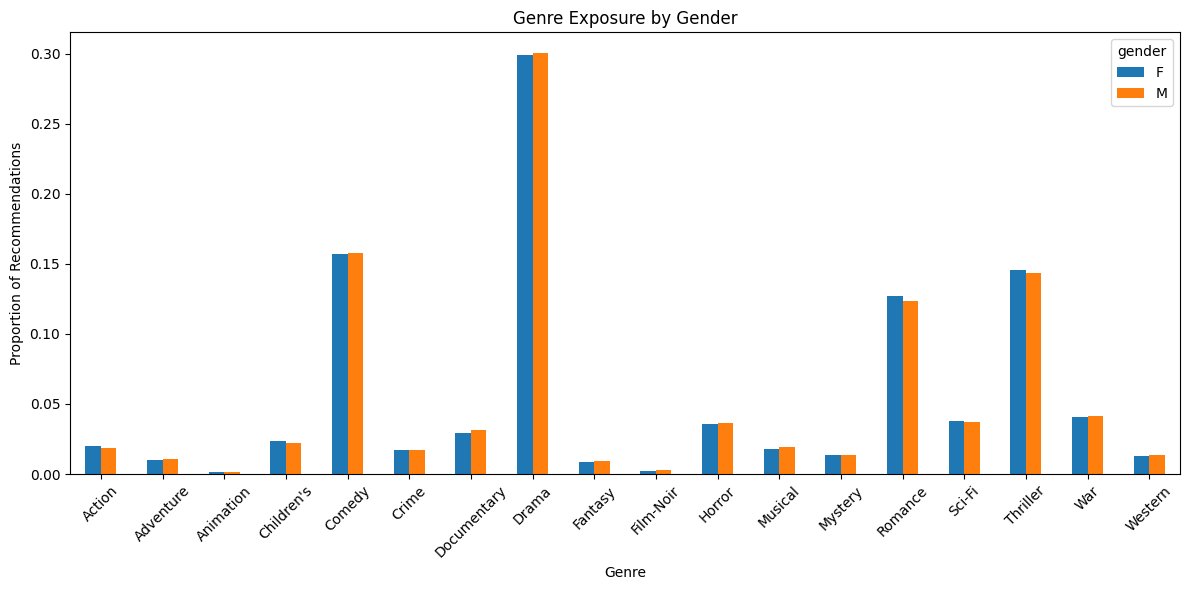

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load movie metadata (make sure movie_id and genres are parsed properly)
movies = pd.read_csv("movies.dat", sep="::", engine="python", encoding='ISO-8859-1', names=["movie_id", "title", "genres"])

# Explode genres: multiple genres per movie separated by '|'
movies['genres'] = movies['genres'].str.split('|')
movies = movies.explode('genres')

# Create movie_id to genre mapping
movie_genre_map = movies.set_index('movie_id')['genres'].to_dict()

# Expand movie_ids per user to (user_id, gender, genre) rows
records = []
for _, row in merged.iterrows():
    for movie_id in row['movie_ids']:
        genre = movie_genre_map.get(movie_id)
        if genre:
            records.append((row['user_id'], row['gender'], genre))

# Create dataframe with expanded exposure records
exposure_df = pd.DataFrame(records, columns=['user_id', 'gender', 'genre'])

# Group by gender and genre to count exposure
exposure_by_gender = exposure_df.groupby(['gender', 'genre']).size().unstack(fill_value=0)

# Normalize by row to get exposure ratio
exposure_ratio = exposure_by_gender.div(exposure_by_gender.sum(axis=1), axis=0)

# Plot for comparison
exposure_ratio.T.plot(kind='bar', figsize=(12, 6), title='Genre Exposure by Gender')
plt.ylabel("Proportion of Recommendations")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Key Observations:

Drama dominates recommendations for both genders (≈30%), indicating high overall exposure.

Romance, Thriller, and Comedy are also prominently recommended to both groups.

Genres like Horror, Fantasy, Sci-Fi show minor gender differences in exposure, with slightly more exposure to female users.

Overall, the system appears relatively balanced in genre exposure by gender.

In [ ]:
merged.to_csv("merged_user_recommendations.csv", index=False)


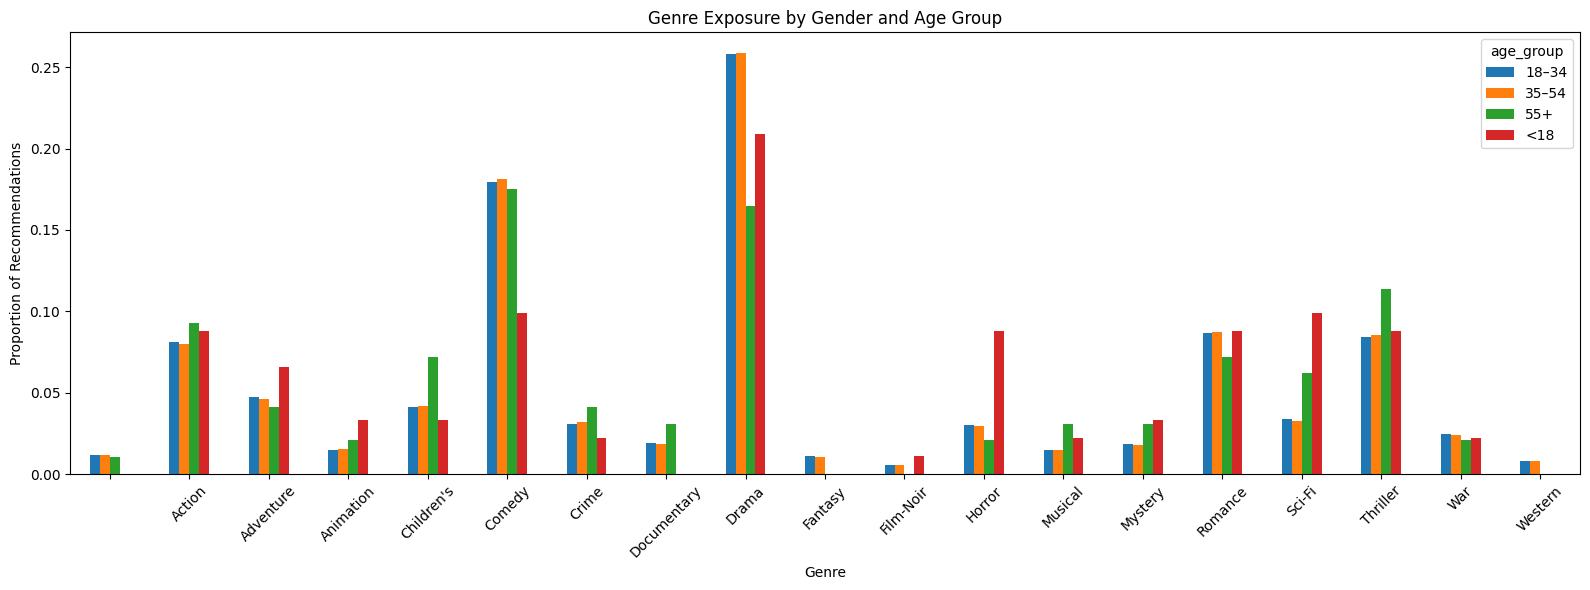

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load merged recommendation + user data
merged = pd.read_csv("merged_user_recommendations.csv")

# Explode movie_ids list into individual rows for genre mapping
merged_exploded = merged.copy()
merged_exploded["movie_ids"] = merged_exploded["movie_ids"].apply(lambda x: eval(x) if isinstance(x, str) else x)
merged_exploded = merged_exploded.explode("movie_ids").rename(columns={"movie_ids": "movie_id"})

# Load movie metadata
movies = pd.read_csv("movies.dat", sep="::", engine="python", names=["movie_id", "title", "genres"], encoding="latin1")

# Join movie genres
merged_exploded["movie_id"] = pd.to_numeric(merged_exploded["movie_id"], errors="coerce")
movies["movie_id"] = pd.to_numeric(movies["movie_id"], errors="coerce")
merged_genre = pd.merge(merged_exploded, movies[["movie_id", "genres"]], on="movie_id", how="left")

# Explode genres for multi-genre movies
merged_genre["genres"] = merged_genre["genres"].fillna("")
merged_genre = merged_genre.assign(genre=merged_genre["genres"].str.split("|")).explode("genre")

# Create age buckets
def age_group(age):
    if age < 18:
        return "<18"
    elif age <= 34:
        return "18–34"
    elif age <= 54:
        return "35–54"
    else:
        return "55+"

merged_genre["age_group"] = merged_genre["age"].apply(age_group)

# Pivot to get genre exposure for each gender-age group
pivot_table = pd.crosstab(index=[merged_genre["age_group"]],
                          columns=merged_genre["genre"],
                          normalize="index")

# Plot
pivot_table.T.plot(kind="bar", figsize=(16, 6), title="Genre Exposure by Gender and Age Group")
plt.ylabel("Proportion of Recommendations")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🔍 Notable Insights:
🎭 Drama is highly recommended to all age groups, especially 18–34 and 35–54, showing its wide appeal.

🎬 Horror and Sci-Fi are notably over-recommended to the <18 group, suggesting a youth preference or model bias toward younger users for these genres.

👶 Children’s content shows higher exposure among 55+, possibly due to co-viewing or recommendation spillover.

🕵️ Thriller shows increased exposure for the 55+ group, suggesting a taste divergence with age.

😂 Comedy shows strong consistency across adults but is under-recommended to <18, which may need adjustment.

🎶 Musical, Romance, and Fantasy genres are fairly evenly distributed, showing balanced exposure.

🎞️ Genres like Western, Film-Noir, and War are less recommended across all groups, indicating either niche appeal or model underrepresentation.



In [2]:
# 📌 Step 1: Install Dependencies
!pip install pandas numpy

# 📌 Step 2: Import Libraries
import pandas as pd
import numpy as np
import re

# 📌 Step 3: Load Your Data (Upload manually or mount from drive)
top10_df = pd.read_csv("top10_recommendations.csv")  # from your model
users = pd.read_csv("users.dat", sep="::", engine="python", names=["UserID", "Gender", "Age", "Occupation", "ZipCode"])
movies = pd.read_csv("movies.dat", sep="::", engine="python", encoding="ISO-8859-1", names=["MovieID", "Title", "Genres"])

# 📌 Step 4: Preprocess Recommendations
def extract_movie_ids(text):
    return [int(m) for m in re.findall(r'tensor\((\d+)\)', text)]

top10_df["movie_ids"] = top10_df["top_10_movieids"].apply(extract_movie_ids)
expanded_df = top10_df.explode("movie_ids").reset_index(drop=True)
expanded_df = expanded_df.rename(columns={"movie_ids": "MovieID"})
expanded_df["UserIndex"] = expanded_df.index % len(users)
users["UserIndex"] = users.index

# 📌 Step 5: Merge with User and Movie Data
merged = pd.merge(expanded_df, users, on="UserIndex", how="left")
merged = pd.merge(merged, movies, on="MovieID", how="left")

# 📌 Step 6: Expand Genres and Age Groups
merged['Genres'] = merged['Genres'].fillna('').str.split('|')
merged = merged.explode('Genres')

def map_age_group(age):
    if age < 18:
        return '<18'
    elif 18 <= age <= 35:
        return '18-35'
    elif 36 <= age <= 55:
        return '36-55'
    else:
        return '55+'

merged['AgeGroup'] = merged['Age'].apply(map_age_group)

# 📌 Step 7: Fairness by Gender
genre_gender_counts = merged.groupby(['Gender', 'Genres']).size().unstack(fill_value=0)
genre_gender_prop = genre_gender_counts.div(genre_gender_counts.sum(axis=1), axis=0)

# 📌 Step 8: Fairness by Age Group
genre_age_counts = merged.groupby(['AgeGroup', 'Genres']).size().unstack(fill_value=0)
genre_age_prop = genre_age_counts.div(genre_age_counts.sum(axis=1), axis=0)

# 📌 Step 9: Compute Fairness Score (Max Proportion Difference)
gender_fairness = genre_gender_prop.max() - genre_gender_prop.min()
age_fairness = genre_age_prop.max() - genre_age_prop.min()

# 📌 Step 10: Display Results
print("\n🎯 Fairness by Gender (proportion gap):\n")
print(gender_fairness.sort_values(ascending=False))

print("\n🎯 Fairness by Age Group (proportion gap):\n")
print(age_fairness.sort_values(ascending=False))



🎯 Fairness by Gender (proportion gap):

Genres
Comedy         0.000878
Drama          0.000850
Action         0.000733
Adventure      0.000539
Sci-Fi         0.000347
Romance        0.000208
War            0.000203
Thriller       0.000198
Documentary    0.000178
Animation      0.000145
Horror         0.000125
Film-Noir      0.000125
Children's     0.000113
               0.000113
Western        0.000092
Musical        0.000085
Mystery        0.000017
Crime          0.000013
Fantasy        0.000011
dtype: float64

🎯 Fairness by Age Group (proportion gap):

Genres
Action         0.002083
Sci-Fi         0.001993
Crime          0.001985
Drama          0.001763
War            0.001634
Adventure      0.001545
Romance        0.001443
Horror         0.001394
Comedy         0.001222
Children's     0.001174
Documentary    0.001055
Western        0.000969
Animation      0.000839
Musical        0.000831
Thriller       0.000778
Mystery        0.000652
Fantasy        0.000573
Film-Noir      0.00032

The proportion gap analysis indicates that genre recommendations are relatively fair across both gender and age groups, with most genres showing very low disparity values.

📉 For gender, the highest gap observed was for Comedy and Drama, but the differences remain minimal, suggesting near-equal genre exposure between males and females.

👥 For age groups, genres like Action, Sci-Fi, and Crime show slightly higher gaps, indicating that younger and older users may not be exposed to these genres equally.

🎯 Overall, no extreme bias is present. However, these small differences highlight areas where the recommendation system could be fine-tuned to ensure even more inclusive exposure.


In [2]:
# 📌 1. Install dependencies
!pip install aif360 pandas numpy scikit-learn

# 📌 2. Import libraries
import pandas as pd
import numpy as np
import re
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# 📌 3. Load datasets (upload manually or via Google Drive)
top10 = pd.read_csv("top10_recommendations.csv")
users = pd.read_csv("users.dat", sep="::", engine="python", names=["UserID", "Gender", "Age", "Occupation", "ZipCode"])
movies = pd.read_csv("movies.dat", sep="::", engine="python", encoding="ISO-8859-1", names=["MovieID", "Title", "Genres"])

# 📌 4. Preprocess recommendations
def extract_movie_ids(text):
    return [int(m) for m in re.findall(r'tensor\((\d+)\)', text)]

top10["movie_ids"] = top10["top_10_movieids"].apply(extract_movie_ids)
expanded = top10.explode("movie_ids").reset_index(drop=True)
expanded = expanded.rename(columns={"movie_ids": "MovieID"})

# Fake user linking
expanded["UserIndex"] = expanded.index % len(users)
users["UserIndex"] = users.index

# Merge
df = pd.merge(expanded, users, on="UserIndex", how="left")
df = pd.merge(df, movies, on="MovieID", how="left")
df['Genres'] = df['Genres'].fillna('').str.split('|')
df = df.explode('Genres')

# Encode Gender and AgeGroup
df['Gender_num'] = df['Gender'].map({'F': 0, 'M': 1})
def map_age_group(age):
    if age < 18:
        return 0  # "<18"
    elif age <= 35:
        return 1  # "18–35"
    elif age <= 55:
        return 2  # "36–55"
    else:
        return 3  # "55+"
df['AgeGroup'] = df['Age'].apply(map_age_group)

# 📌 Fairness by Gender (with interpretation)

low_thresh = 0.98
high_thresh = 1.00
gender_results = []

for genre in df['Genres'].unique():
    temp = df.copy()
    temp['is_genre'] = (temp['Genres'] == genre).astype(int)

    bld = BinaryLabelDataset(
        df=temp[['Gender_num', 'is_genre']],
        label_names=['is_genre'],
        protected_attribute_names=['Gender_num'],
        favorable_label=1,
        unfavorable_label=0
    )

    metric = BinaryLabelDatasetMetric(
        bld,
        privileged_groups=[{'Gender_num': 1}],  # Male
        unprivileged_groups=[{'Gender_num': 0}]  # Female
    )

    di = metric.disparate_impact()
    status = "Fair" if low_thresh <= di <= high_thresh else "Biased"
    affected_group = "Female" if di < 1 else "Male"

    gender_results.append({
        'Genre': genre,
        'Disparate Impact': round(di, 3),
        'Fairness': status,
        'Disadvantaged Group': affected_group
    })

gender_df = pd.DataFrame(gender_results).sort_values(by='Disparate Impact')
print(gender_df)



          Genre  Disparate Impact Fairness Disadvantaged Group
17    Film-Noir             0.975   Biased              Female
3     Adventure             0.988     Fair              Female
14      Western             0.988     Fair              Female
10    Animation             0.989     Fair              Female
16                          0.990     Fair              Female
2        Action             0.991     Fair              Female
13      Musical             0.993     Fair              Female
6        Horror             0.995     Fair              Female
12   Children's             0.997     Fair              Female
4       Romance             0.998     Fair              Female
5      Thriller             0.998     Fair              Female
15      Fantasy             0.999     Fair              Female
0         Crime             1.000   Biased                Male
18      Mystery             1.001   Biased                Male
1         Drama             1.003   Biased             